# Trainer notes - Python Charmers

Copyright (c) 2018 Python Charmers. All rights reserved. Please do not distribute.

# Python training day 3

- Visualisation and pandas revision
- Arrays
  - Introduction to manipulating vectors and matrices with NumPy
  - NumPy essentials: data types, boolean & "fancy" indexing
  - Introduction to extracting gridded data from HDF5 and NetCDF files
- Tour of SciPy and related packages for scientific computing, with topics selected from (if you want to see something else, let me know!):
  - unit conversions
  - image processing
  - clustering
  - interpolation
  - statistics: regression, density estimation, confidence intervals
  - dense & sparse linear algebra
  - packaging Python scripts
  - (Very quick) dask demo - reading pandas dataframes in parallel

## Pandas and visualisation

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [4]:
cars = pd.read_csv('Data/Auto.csv', index_col=0)

In [5]:
%whos

Variable   Type         Data/Info
---------------------------------
autopep8   module       <module 'autopep8' from '<...>te-packages/autopep8.py'>
cars       DataFrame          mpg  cylinders  dis<...>n\n[392 rows x 9 columns]
json       module       <module 'json' from '/Lib<...>hon3.6/json/__init__.py'>
pd         module       <module 'pandas' from '/L<...>ages/pandas/__init__.py'>


In [6]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%pyth

In [10]:
cars = pd.read_csv('Data/Auto.csv', index_col=0)
cars.sample(10)

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
246  36.1          4          98.0          66    1800          14.4    78   
44   13.0          8         400.0         170    4746          12.0    71   
46   18.0          6         258.0         110    2962          13.5    71   
266  17.5          8         318.0         140    4080          13.7    78   
315  26.4          4         140.0          88    2870          18.1    80   
381  36.0          4         107.0          75    2205          14.5    82   
141  14.0          8         304.0         150    4257          15.5    74   
3    18.0          8         318.0         150    3436          11.0    70   
89   14.0          8         302.0         137    4042          14.5    73   
157  16.0          8         400.0         170    4668          11.5    75   

     origin                        name  
246       1                 ford fiesta  
44        1    ford country squire (sw)  
46        1  amc hornet sportabout (sw)  
266       1             dodge magnum xe  
315       1               ford fairmont  
381       3                honda accord  
141       1            amc matador (sw)  
3         1          plymouth satellite  
89        1            ford gran torino  
157       1            pontiac catalina

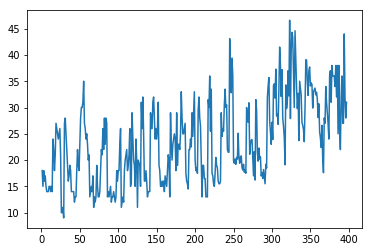

In [11]:
cars['mpg'].plot()

In [13]:
mpg = cars.pivot_table(
    values='mpg',
    index='year',
    columns=['origin', 'cylinders']
)
mpg

origin             1                                2                 3  \
cylinders          4          6          8          4     5     6     3   
year                                                                      
70               NaN  20.500000  14.111111  25.200000   NaN   NaN   NaN   
71         24.750000  18.000000  13.428571  28.750000   NaN   NaN   NaN   
72         23.200000        NaN  13.615385  22.000000   NaN   NaN  19.0   
73         20.000000  18.857143  13.200000  24.000000   NaN   NaN  18.0   
74         26.333333  17.333333  14.200000  27.000000   NaN   NaN   NaN   
75         23.000000  17.583333  15.666667  24.500000   NaN   NaN   NaN   
76         26.200000  20.562500  14.666667  25.357143   NaN  16.5   NaN   
77         28.250000  18.875000  16.000000  29.250000   NaN   NaN  21.5   
78         28.183333  19.560000  19.050000  32.066667  20.3  16.6   NaN   
79         30.857143  22.950000  18.630000  32.133333  25.4   NaN   NaN   
80         27.740000  19.100000        NaN  36.900000  36.4   NaN  23.7   
81         30.950000  20.925000  26.600000  30.550000   NaN  30.7   NaN   
82         30.062500  28.333333        NaN  40.000000   NaN   NaN   NaN   

origin                      
cylinders          4     6  
year                        
70         25.500000   NaN  
71         29.500000   NaN  
72         25.500000   NaN  
73         21.000000  20.0  
74         29.333333   NaN  
75         27.500000   NaN  
76         31.000000  19.0  
77         30.250000  22.0  
78         29.687500   NaN  
79         32.950000   NaN  
80         36.709091  32.7  
81         34.590000  24.8  
82         34.888889   NaN

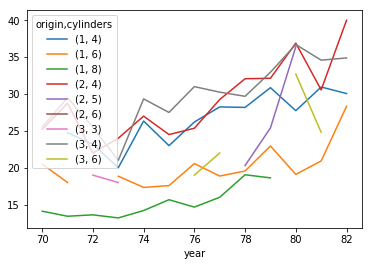

In [14]:
mpg.plot()

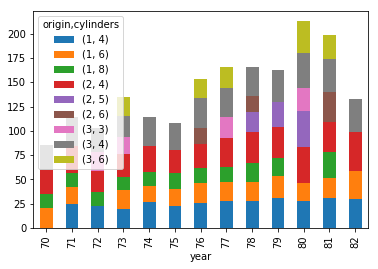

In [16]:
mpg.plot(kind='bar', stacked=True)

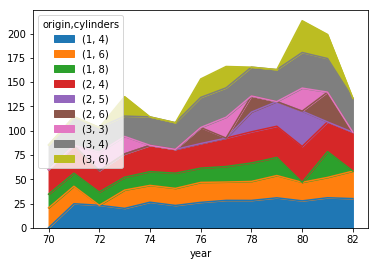

In [17]:
mpg.plot(kind='area', stacked=True)

In [19]:
airports = pd.read_csv('Data/airports.csv.gz')

In [20]:
airports.columns

Index(['Airport_ID', 'Name', 'City', 'Country', 'IATA_FAA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz_db_time_zone'],
      dtype='object')

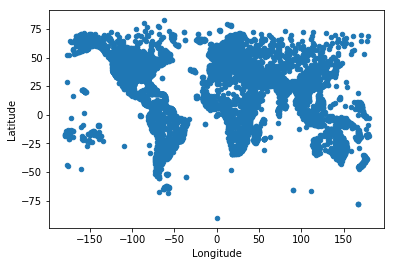

In [21]:
airports.plot(kind='scatter', x='Longitude', y='Latitude')

In [22]:
import seaborn

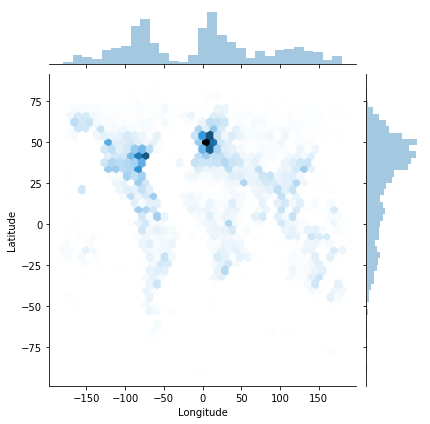

In [25]:
seaborn.jointplot(
    x='Longitude', y='Latitude', data=airports,
    kind='hexgrid'
)

### Exercise: Plotting data in seaborn

Seaborn aims to make producing plots as easy as possible - the arguments should be the same, just the type of the plot should change.

Using the cars dataset, create a 

- `seaborn.boxplot` with x as the origin and y as the mpg
- `seaborn.swarmplot` with x as the year and y as the cylinders
- `seaborn.violinplot` with x as the cylinders and y as the weight

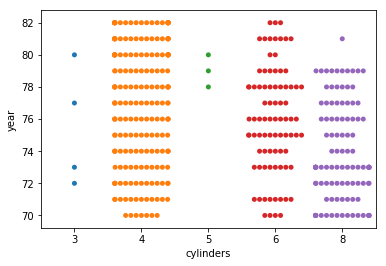

In [29]:
seaborn.swarmplot(
    x='cylinders', y='year', data=cars,
)

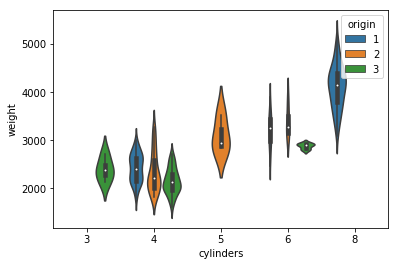

In [33]:
seaborn.violinplot(
    x='cylinders', y='weight', data=cars, hue='origin',
)

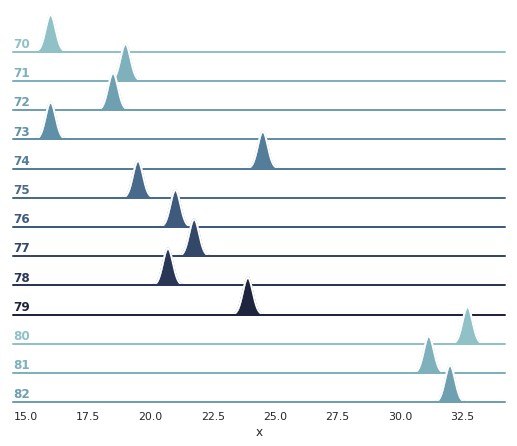

In [44]:
# %load https://seaborn.pydata.org/_downloads/kde_ridgeplot.py
"""
Overlapping densities ('ridge plot')
====================================


"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

df = my_df

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)


In [43]:
my_df = (
    cars.groupby('year')['mpg'].median().reset_index()
).rename(columns={'year':'g', 'mpg': 'x'})

In [36]:
df

x  g
0    64.038123  A
1    66.147050  B
2    66.370011  C
3    68.791019  D
4    70.583534  E
5    69.135114  F
6    72.390092  G
7    73.822191  H
8    73.868785  I
9    72.938377  J
10   65.723433  A
11   66.580572  B
12   68.631715  C
13   68.175267  D
14   68.772384  E
15   70.369829  F
16   72.296533  G
17   70.704948  H
18   73.755082  I
19   75.130836  J
20   67.067787  A
21   64.544249  B
22   66.549600  C
23   68.577936  D
24   70.324557  E
25   69.317165  F
26   71.623854  G
27   72.661729  H
28   73.140564  I
29   73.978304  J
..         ... ..
470  64.413991  A
471  67.116115  B
472  66.234674  C
473  67.035529  D
474  69.154908  E
475  69.085536  F
476  71.498106  G
477  71.599936  H
478  72.539776  I
479  73.719101  J
480  63.521875  A
481  65.650484  B
482  65.996162  C
483  67.250952  D
484  69.450876  E
485  70.155390  F
486  70.778408  G
487  70.343478  H
488  73.454085  I
489  73.603612  J
490  64.724145  A
491  67.263671  B
492  69.148477  C
493  66.273590  D
494  67.581777  E
495  69.358022  F
496  72.212877  G
497  70.474247  H
498  73.251022  I
499  74.461828  J

[500 rows x 2 columns]

### Quick Exercise: Plotting with matplotlib

Rather than bulding a matplotlib plot from scratch:

1. Google the matplotlib thumbnail gallery
2. Choose a plot you like the look of
3. From the plot find the link to the source code and copy it
4. Use the `%load` magic to load the code
5. Run it to see the plot in your notebook

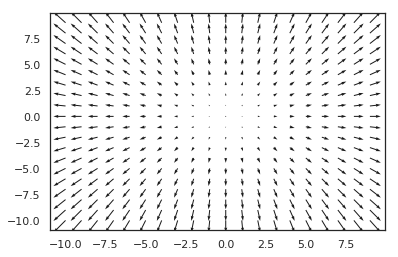

In [46]:
# %load https://matplotlib.org/mpl_examples/pylab_examples/quiver_simple_demo.py
'''
==================================================
A simple example of a quiver plot with a quiverkey
==================================================
'''
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()


In [2]:
%matplotlib tk

In [3]:
# %load https://matplotlib.org/mpl_examples/mplot3d/custom_shaded_3d_surface.py
"""
Demonstrates using custom hillshading in a 3D surface plot.
"""
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
cars = pd.read_csv('Data/Auto.csv')

In [8]:
import seaborn

In [10]:
from matplotlib import pyplot as plt

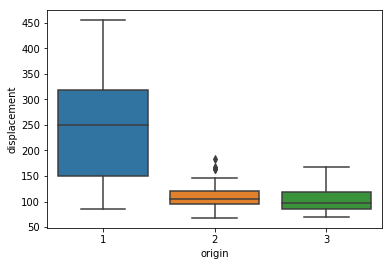

In [11]:
seaborn.boxplot(x='origin', y='displacement', data=cars)
plt.savefig('boxplot.png', dpi=600)

## Plotting with Altair

## Break to 10:45

In [12]:
import altair as alt

In [13]:
chart = alt.Chart(cars)

In [15]:
chart.mark_circle()

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [16]:
alt.renderers.enable('notebook')  # equivalent of matplotlib inline

RendererRegistry.enable('notebook')

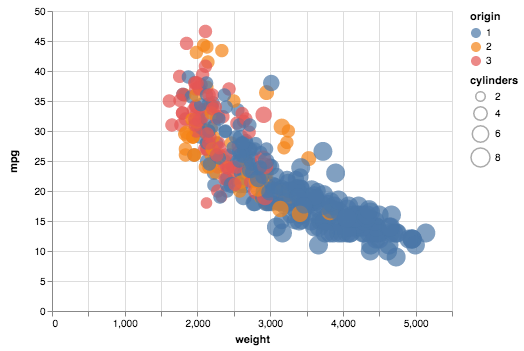

In [23]:
chart.mark_circle().encode(
    x='weight',
    y='mpg',
    color='origin:N',  # Nominative, or Q for quantitative
    # or O for ordinal
    size='cylinders'
).interactive()

### Exercise: Creating a chart from a different dataset

Use pandas to read in the abalone dataset. Create a chart from the abalone dataset, and use the mark_circle to create a circular plot. Plot the diameter vs the shucked weight, use the sex as the colour, and the rings as the size. If you want, make the chart interactive.

Once you've made your own chart, take a look at the altair gallery: https://altair-viz.github.io/gallery/index.html - pick a chart and use %load to load up and display the chart.

## Numpy - numeric data in Python

In [24]:
import numpy as np

In [26]:
a = np.array([1, 2, 3, 4, 5]) 

In [27]:
a[0]

1

In [28]:
5 * a

array([ 5, 10, 15, 20, 25])

In [29]:
cars['displacement'].values

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 455. , 113. , 198. , 199. , 200. ,
        97. ,  97. , 110. , 107. , 104. , 121. , 199. , 360. , 307. ,
       318. , 304. ,  97. , 140. , 113. , 232. , 225. , 250. , 250. ,
       232. , 350. , 400. , 351. , 318. , 383. , 400. , 400. , 258. ,
       140. , 250. , 250. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        97. ,  91. , 113. ,  97.5,  97. , 140. , 122. , 350. , 400. ,
       318. , 351. , 304. , 429. , 350. , 350. , 400. ,  70. , 304. ,
       307. , 302. , 318. , 121. , 121. , 120. ,  96. , 122. ,  97. ,
       120. ,  98. ,  97. , 350. , 304. , 350. , 302. , 318. , 429. ,
       400. , 351. , 318. , 440. , 455. , 360. , 225. , 250. , 232. ,
       250. , 198. ,  97. , 400. , 400. , 360. , 350. , 232. ,  97. ,
       140. , 108. ,  70. , 122. , 155. ,  98. , 350. , 400. ,  68. ,
       116. , 114. , 121. , 318. , 121. , 156. , 350. , 198. , 232. ,
       250. ,  79. ,

In [30]:
a.shape

(5,)

In [31]:
a.ndim

1

In [32]:
from PIL import Image

In [35]:
balloon = np.array(Image.open('Data/hot-air-balloon1.jpg')) 
balloon

array([[[ 60, 112, 170],
        [ 60, 112, 170],
        [ 60, 112, 170],
        ...,
        [ 67, 118, 175],
        [ 68, 119, 176],
        [ 68, 119, 176]],

       [[ 60, 112, 170],
        [ 60, 112, 170],
        [ 60, 112, 170],
        ...,
        [ 67, 118, 175],
        [ 68, 119, 176],
        [ 68, 119, 176]],

       [[ 60, 112, 170],
        [ 60, 112, 170],
        [ 60, 112, 170],
        ...,
        [ 66, 118, 175],
        [ 66, 118, 175],
        [ 66, 118, 175]],

       ...,

       [[ 89, 155, 190],
        [ 90, 156, 191],
        [ 91, 155, 191],
        ...,
        [102, 160, 198],
        [103, 161, 199],
        [103, 163, 200]],

       [[ 89, 154, 192],
        [ 89, 154, 192],
        [ 91, 155, 193],
        ...,
        [102, 160, 198],
        [102, 162, 199],
        [102, 162, 199]],

       [[ 89, 154, 192],
        [ 89, 154, 192],
        [ 91, 155, 193],
        ...,
        [100, 160, 197],
        [101, 161, 198],
        [102, 162, 199]]

In [36]:
balloon.ndim

3

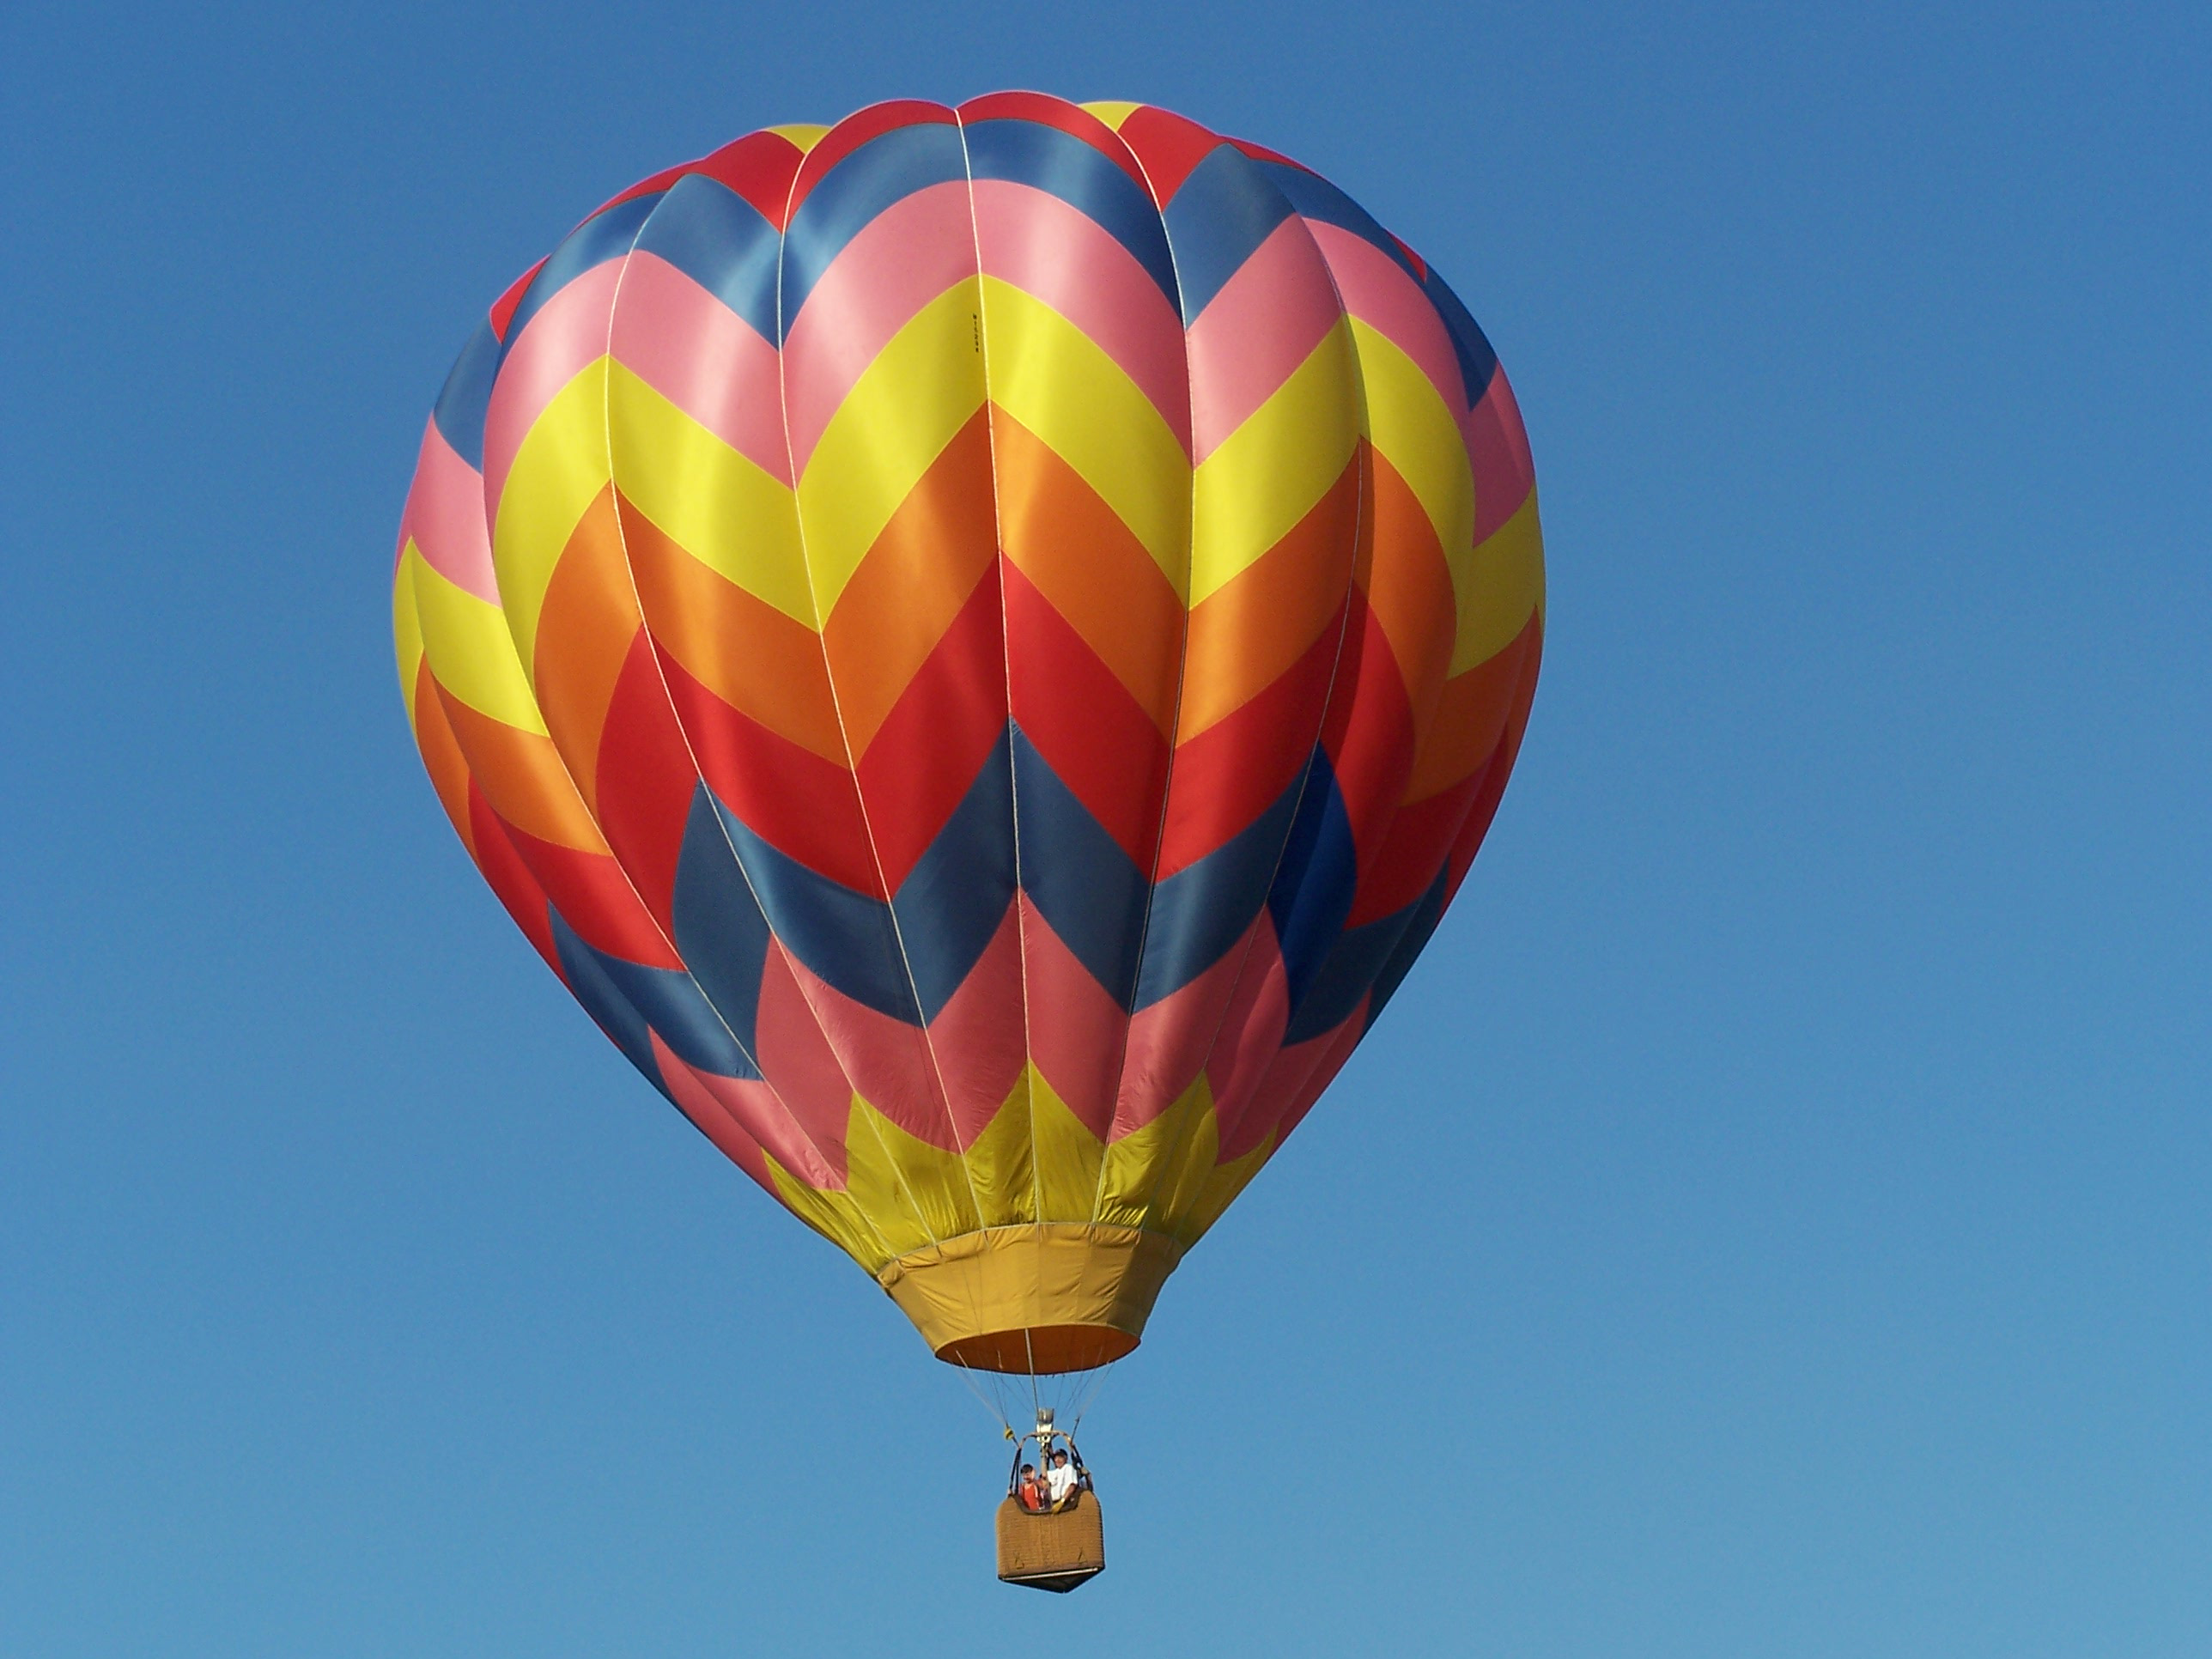

In [37]:
Image.fromarray(balloon)

In [38]:
balloon.shape  # rows (y), columns (x), bands (z)

(1932, 2576, 3)

In [41]:
balloon[:, 0]

array([[ 60, 112, 170],
       [ 60, 112, 170],
       [ 60, 112, 170],
       ...,
       [ 89, 155, 190],
       [ 89, 154, 192],
       [ 89, 154, 192]], dtype=uint8)

In [42]:
balloon[:, :, 0]

array([[ 60,  60,  60, ...,  67,  68,  68],
       [ 60,  60,  60, ...,  67,  68,  68],
       [ 60,  60,  60, ...,  66,  66,  66],
       ...,
       [ 89,  90,  91, ..., 102, 103, 103],
       [ 89,  89,  91, ..., 102, 102, 102],
       [ 89,  89,  91, ..., 100, 101, 102]], dtype=uint8)

In [43]:
import matplotlib.pyplot as plt

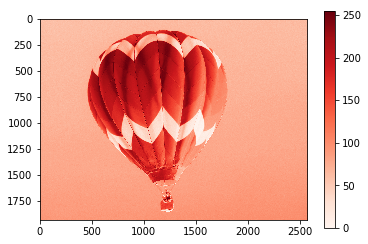

In [45]:
plt.imshow(balloon[:, :, 0], cmap='Reds')
plt.colorbar()

### Exercise: Indexing the numpy array

1. Index out the green and the blue bands and plot them using `imshow` (there are Greens and Blues colourmaps as well)
2. When you use imshow you'll notice numbers around the edge of the plot - by default these are the indicies in the x and y dimension. Given this, use slicing to try and slice out the balloon basket (with all three colours) and plot out just the basket.

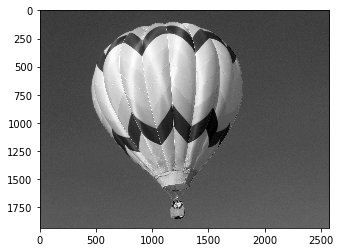

In [52]:
plt.imshow(
    balloon[:, :, 0], cmap='gray'
)

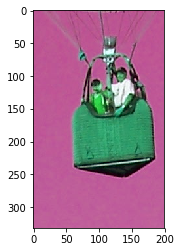

In [54]:
plt.imshow(
    balloon[1600:, 1100:1300, [2, 0, 1]]
)

In [55]:
basket = balloon[1600:, 1100:1300]  # slice out a VIEW

In [56]:
balloon[1600:, 1100:1300] = 0

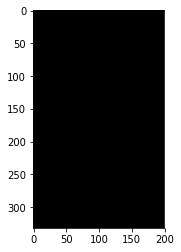

In [58]:
plt.imshow(basket)  # the VIEW is NOT a copy

In [59]:
balloon[1600:, 1100:1300].copy()  # copies the data instead

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [60]:
np.mean(balloon)

121.60216258053316

In [61]:
balloon.mean()

121.60216258053316

In [64]:
np.radians(balloon)

array([[[1.047, 1.955, 2.967],
        [1.047, 1.955, 2.967],
        [1.047, 1.955, 2.967],
        ...,
        [1.169, 2.059, 3.055],
        [1.187, 2.076, 3.072],
        [1.187, 2.076, 3.072]],

       [[1.047, 1.955, 2.967],
        [1.047, 1.955, 2.967],
        [1.047, 1.955, 2.967],
        ...,
        [1.169, 2.059, 3.055],
        [1.187, 2.076, 3.072],
        [1.187, 2.076, 3.072]],

       [[1.047, 1.955, 2.967],
        [1.047, 1.955, 2.967],
        [1.047, 1.955, 2.967],
        ...,
        [1.152, 2.059, 3.055],
        [1.152, 2.059, 3.055],
        [1.152, 2.059, 3.055]],

       ...,

       [[1.554, 2.705, 3.316],
        [1.57 , 2.723, 3.334],
        [1.588, 2.705, 3.334],
        ...,
        [1.78 , 2.793, 3.455],
        [1.798, 2.81 , 3.473],
        [1.798, 2.846, 3.49 ]],

       [[1.554, 2.688, 3.352],
        [1.554, 2.688, 3.352],
        [1.588, 2.705, 3.37 ],
        ...,
        [1.78 , 2.793, 3.455],
        [1.78 , 2.828, 3.473],
        [1.78 ,

In [65]:
balloon.shape

(1932, 2576, 3)

In [67]:
balloon.mean(axis=1)

array([[ 61.98874224, 116.19914596, 171.09627329],
       [ 62.07142857, 116.25194099, 171.16343168],
       [ 62.13159938, 116.29930124, 171.22204969],
       ...,
       [ 87.72476708, 143.32026398, 178.11218944],
       [ 87.71156832, 143.33074534, 178.10481366],
       [ 87.69448758, 143.37694099, 178.10093168]])

In [69]:
np.median(balloon, axis=2)

array([[112., 112., 112., ..., 118., 119., 119.],
       [112., 112., 112., ..., 118., 119., 119.],
       [112., 112., 112., ..., 118., 118., 118.],
       ...,
       [155., 156., 155., ..., 160., 161., 163.],
       [154., 154., 155., ..., 160., 162., 162.],
       [154., 154., 155., ..., 160., 161., 162.]])

In [70]:
balloon.sum(axis=(0, 1)) 

array([485539329, 605464971, 724576302], dtype=uint64)

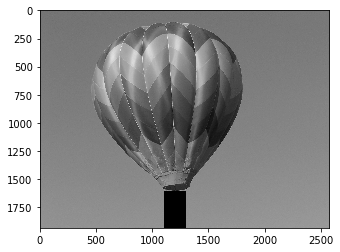

In [72]:
plt.imshow(np.mean(balloon, axis=2), cmap='gray')

### Exercise: Modelling probability using numpy universal functions

The probability of rolling 5 dice and getting the same value on each die is $6 * \frac{1}{6^5}$

We can model this by generating random dice rolls.

In [76]:
roll = np.random.randint(1, 7, 5)

In [77]:
roll[0] == roll

array([ True, False, False, False, False])

In [78]:
np.all(roll[0] == roll)  # is every value True?

False

In [79]:
rolls = np.random.randint(1, 7, (5, 10000))
rolls

array([[6, 2, 4, ..., 6, 6, 6],
       [6, 2, 1, ..., 1, 1, 4],
       [4, 5, 1, ..., 3, 1, 4],
       [4, 6, 1, ..., 5, 6, 2],
       [4, 4, 5, ..., 1, 1, 4]])

Given rolls, use `rolls[0] == rolls` to "broadcast" whether each die was the samd ass first die in each roll. Use `np.all` to collapse this data so you have a single dimension array of just True or False - i.e. was each die the same, on a roll by roll basis.

Take the mean of your result, and compare it to the true probability.

In [81]:
roll = np.random.randint(1, 7, 5)

In [84]:
roll

array([4, 1, 2, 4, 4])

In [83]:
roll[0]

4

In [85]:
roll[0] == roll

array([ True, False, False,  True,  True])

In [86]:
np.all(roll[0] == roll)

False

In [125]:
rolls = np.random.randint(1, 7, (5, 10000000))
rolls

rolls[0]

rolls[0] == rolls

np.all(rolls[0] == rolls)

np.all(rolls[0] == rolls, axis=0)

np.all(rolls[0] == rolls, axis=0).mean()

0.00078

## Lunch - back at 1:20

## Broadcasting in numpy

In [126]:
np.array([1, 2, 3])  * 3

array([3, 6, 9])

In [127]:
np.array([1, 2, 3]) * np.array([3, 3, 3])

array([3, 6, 9])

In [129]:
a = np.arange(6).reshape(3, 2)

In [130]:
a * 3

array([[ 0,  3],
       [ 6,  9],
       [12, 15]])

In [131]:
b = np.array([1, 2])

In [132]:
a * b

array([[ 0,  2],
       [ 2,  6],
       [ 4, 10]])

In [133]:
a.shape

(3, 2)

In [134]:
b.shape

(2,)

In [135]:
c = np.array([3, 4, 5])

In [137]:
a * c # shapes must match the right n dimensions

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

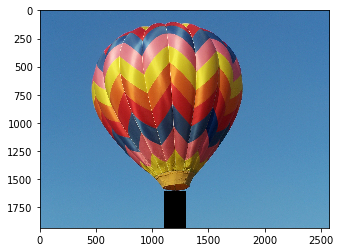

In [138]:
plt.imshow(balloon)

In [139]:
balloon.shape

(1932, 2576, 3)

In [140]:
balloon * np.array([1, 0, 0])

array([[[ 60,   0,   0],
        [ 60,   0,   0],
        [ 60,   0,   0],
        ...,
        [ 67,   0,   0],
        [ 68,   0,   0],
        [ 68,   0,   0]],

       [[ 60,   0,   0],
        [ 60,   0,   0],
        [ 60,   0,   0],
        ...,
        [ 67,   0,   0],
        [ 68,   0,   0],
        [ 68,   0,   0]],

       [[ 60,   0,   0],
        [ 60,   0,   0],
        [ 60,   0,   0],
        ...,
        [ 66,   0,   0],
        [ 66,   0,   0],
        [ 66,   0,   0]],

       ...,

       [[ 89,   0,   0],
        [ 90,   0,   0],
        [ 91,   0,   0],
        ...,
        [102,   0,   0],
        [103,   0,   0],
        [103,   0,   0]],

       [[ 89,   0,   0],
        [ 89,   0,   0],
        [ 91,   0,   0],
        ...,
        [102,   0,   0],
        [102,   0,   0],
        [102,   0,   0]],

       [[ 89,   0,   0],
        [ 89,   0,   0],
        [ 91,   0,   0],
        ...,
        [100,   0,   0],
        [101,   0,   0],
        [102,   0,   0]]

### Exercise: Broadcasting and luminance

As it turns out, when you look at colour, your eyes place difference emphasis on different wavelengths of light - ie some colours appear brighter than others. To get a better black and white image you can weight your colours using broadcating.

$$
L = 0.2126R + 0.7152G + 0.0722B
$$

Create a weight array from these values, and use broadcasting to weight your balloon. To see the overall luminance (the better black and white image) take the `sum` across the bands axis. Plot with `plt.imshow(luminance, cmap='gray')`

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [141]:
balloon.shape

(1932, 2576, 3)

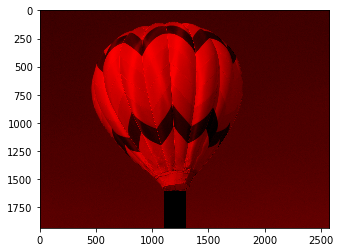

In [143]:
plt.imshow(
    balloon * np.array([1, 0, 0])
)

In [144]:
weights = np.array([0.2126, 0.7152, 0.0722])

In [147]:
np.sum(balloon * weights, axis=2)

array([[105.1324, 105.1324, 105.1324, ..., 111.2728, 112.2728, 112.2728],
       [105.1324, 105.1324, 105.1324, ..., 111.2728, 112.2728, 112.2728],
       [105.1324, 105.1324, 105.1324, ..., 111.0602, 111.0602, 111.0602],
       ...,
       [143.4954, 144.4954, 143.9928, ..., 150.4128, 151.4128, 152.9154],
       [142.9246, 142.9246, 144.1372, ..., 150.4128, 151.9154, 151.9154],
       [142.9246, 142.9246, 144.1372, ..., 149.9154, 150.9154, 151.9154]])

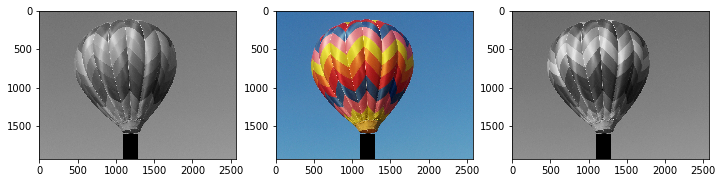

In [150]:
fig, plots = plt.subplots(ncols=3, figsize=(12,8))
plots[0].imshow(balloon.mean(axis=2), cmap='gray')
plots[1].imshow(balloon)
plots[2].imshow(
    np.sum(balloon * weights, axis=2), cmap='gray'
)

## xarray and indexed n-dimensional data

If this fails:

1. Open an Anaconda Prompt (on mac, just the terminal)
2. In the prompt write:

       conda install -y -c conda-forge netcdf4 xarray

In [152]:
import xarray
wind = xarray.open_dataset('Data/spatial/zonal_wind.nc')

In [153]:
wind.coords

Coordinates:
  * time     (time) datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.1 -34.15 -34.2 -34.25 -34.3 -34.35 ...
  * lon      (lon) float32 139.0 139.05 139.1 139.15 139.2 139.25 139.3 ...
  * rho_lvl  (rho_lvl) float32 9.997773 50.00145 130.0025 250.00095 ...

In [154]:
wind.attrs

OrderedDict([('positive', 'up'),
             ('convention', 'COARDS'),
             ('source', 'Australian Bureau of Meteorology'),
             ('modl_vrsn', 'ACCESS-V'),
             ('expt_id', '0001')])

In [156]:
wind.coords['rho_lvl'].attrs

OrderedDict([('long_name', 'height of hybrid rho levels'),
             ('standard_name', 'atmosphere_hybrid_height_coordinate'),
             ('formula_terms', 'a: A_rho b: B_rho orog: topo')])

In [158]:
wind

<xarray.Dataset>
Dimensions:     (lat: 240, lon: 240, rho_lvl: 50, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2011-08-11
  * lat         (lat) float32 -34.05 -34.1 -34.15 -34.2 -34.25 -34.3 -34.35 ...
  * lon         (lon) float32 139.0 139.05 139.1 139.15 139.2 139.25 139.3 ...
  * rho_lvl     (rho_lvl) float32 9.997773 50.00145 130.0025 250.00095 ...
Data variables:
    seg_type    (time) |S4 b'fc  '
    A_rho       (rho_lvl) float32 9.997773 50.00145 130.0025 250.00095 ...
    B_rho       (rho_lvl) float32 0.99885184 0.99426425 0.98512155 0.971487 ...
    base_date   (time) int32 20110809
    base_time   (time) int32 1200
    valid_date  (time) int32 20110811
    valid_time  (time) int32 0
    forc_hrs    (time) timedelta64[ns] 1 days 12:00:00
    wrtn_date   (time) int32 110809
    wrtn_time   (time) int32 1519
    zonal_wnd   (time, rho_lvl, lat, lon) float32 ...
    merid_wnd   (time, rho_lvl, lat, lon) float32 ...
Attributes:
    positive:    up
    convention: 

In [159]:
zonal_wnd = wind['zonal_wnd']

In [160]:
zonal_wnd

<xarray.DataArray 'zonal_wnd' (time: 1, rho_lvl: 50, lat: 240, lon: 240)>
[2880000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.1 -34.15 -34.2 -34.25 -34.3 -34.35 ...
  * lon      (lon) float32 139.0 139.05 139.1 139.15 139.2 139.25 139.3 ...
  * rho_lvl  (rho_lvl) float32 9.997773 50.00145 130.0025 250.00095 ...
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

(array([ 252888., 1042915.,  734902.,  222873.,  173720.,  151571.,
         114081.,   82055.,   62893.,   42102.]),
 array([-24.646328,  -8.305349,   8.035629,  24.376608,  40.717587,
         57.058563,  73.39954 ,  89.740524, 106.0815  , 122.42248 ,
        138.76346 ], dtype=float32),
 <a list of 10 Patch objects>)

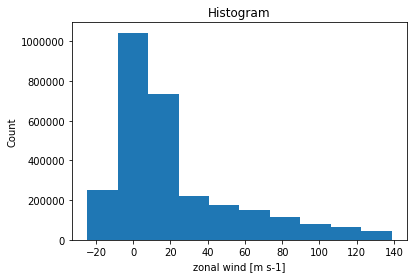

In [163]:
zonal_wnd.plot()

You can index a data array in two ways:

- Like  it is a numpy array - with a position:

In [164]:
zonal_wnd.dims

('time', 'rho_lvl', 'lat', 'lon')

In [165]:
zonal_wnd[0, 0]

<xarray.DataArray 'zonal_wnd' (lat: 240, lon: 240)>
array([[ 1.746712, -1.937746, -1.870728, ...,  1.559071,  1.700897,  1.746712],
       [ 1.825956, -2.003304, -1.937742, ...,  1.563639,  1.683851,  1.825956],
       [ 1.824835, -2.124119, -2.07836 , ...,  1.563559,  1.684151,  1.824835],
       ...,
       [-3.375   ,  1.999985,  2.000065, ..., -3.375065, -3.374985, -3.375   ],
       [-3.32332 ,  2.137337,  2.133352, ..., -3.222349, -3.328426, -3.32332 ],
       [-3.312565,  2.137577,  2.121634, ..., -3.372541, -3.387318, -3.312565]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.1 -34.15 -34.2 -34.25 -34.3 -34.35 ...
  * lon      (lon) float32 139.0 139.05 139.1 139.15 139.2 139.25 139.3 ...
    rho_lvl  float32 9.997773
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

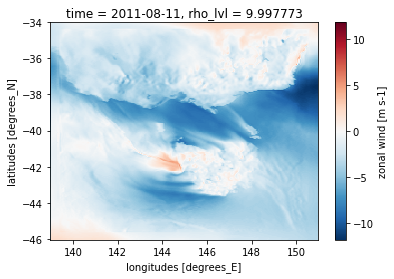

In [166]:
zonal_wnd[0, 0].plot()

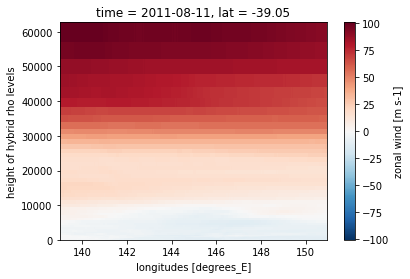

In [168]:
zonal_wnd[0, :, 100].plot()

Instead of indexing as a numpy array, index like a pandas dataframe:

In [172]:
zonal_wnd.loc['2011-08-11', 130.0025]

KeyError: 130.0025

In [174]:
zonal_wnd.sel(rho_lvl=130.0025, method='nearest')

<xarray.DataArray 'zonal_wnd' (time: 1, lat: 240, lon: 240)>
array([[[ 2.686548, -3.37138 , ...,  2.625187,  2.686548],
        [ 2.628557, -3.576017, ...,  2.561789,  2.628557],
        ...,
        [-3.700056,  2.515907, ..., -3.700062, -3.700056],
        [-3.624933,  2.624758, ..., -3.625023, -3.624933]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.1 -34.15 -34.2 -34.25 -34.3 -34.35 ...
  * lon      (lon) float32 139.0 139.05 139.1 139.15 139.2 139.25 139.3 ...
    rho_lvl  float32 130.0025
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

### Exercise: Selecting n-dimensional data in xarray

The location of Melbourne is:

- latitude -37.814
- longitude 144.963

Use the nearest method in `sel` to select the zonal wind data for the 11th August 2011. Plot the wind speed above Melbourne on this date.

In [175]:
zonal_wnd = zonal_wnd[0]

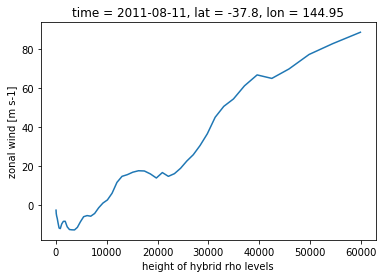

In [179]:
zonal_wnd.sel(lat=-37.814, lon=144.963, method='nearest').plot()

In [180]:
zonal_wnd.sel(lat=-37.814, lon=144.963, method='nearest').to_pandas()

rho_lvl
9.997773        -2.656393
50.001450       -4.385386
130.002502      -5.657133
250.000946      -6.916499
410.003174      -9.276556
610.002686     -11.860210
849.999512     -12.124207
1130.000000     -9.742882
1449.998047     -8.412493
1809.999512     -8.359541
2209.998535    -11.225988
2650.001221    -12.618702
3130.001465    -12.765932
3649.998779    -12.815390
4210.000000    -11.514126
4810.000000     -8.639911
5450.000000     -6.011079
6130.000000     -5.442594
6849.996094     -5.759644
7609.996094     -4.366222
8410.003906     -1.425987
9249.996094      0.998821
10130.003906     2.611660
11050.000000     6.066579
12010.000000    11.642133
13009.996094    14.750083
14050.000000    15.607947
15130.003906    16.874912
16250.000000    17.623810
17410.000000    17.503384
18590.011719    16.000065
19770.265625    13.890682
20951.695312    16.687500
22136.667969    14.746457
23329.660156    16.125006
24537.996094    18.881748
25772.527344    22.624334
27048.355469    25.878307
2838

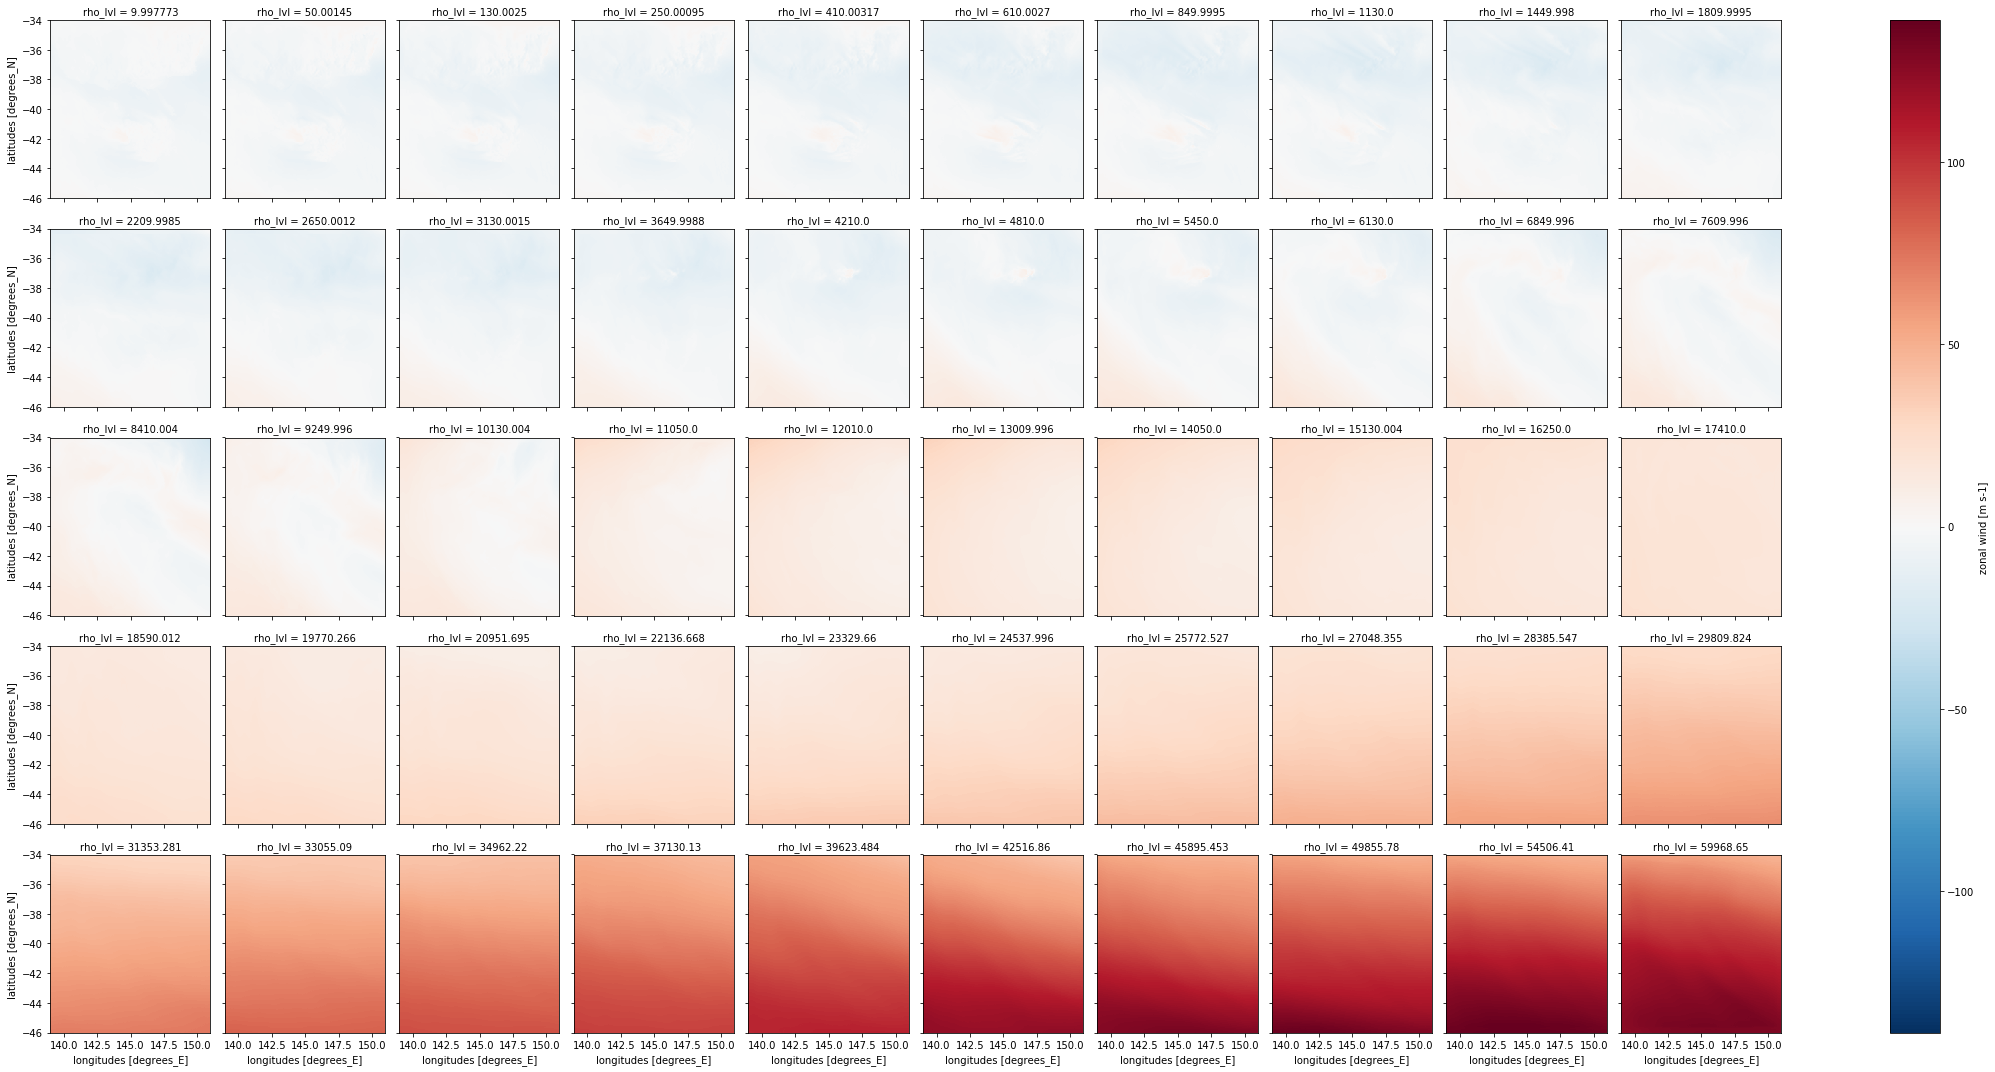

In [185]:
zonal_wnd.plot(x='lon', y='lat', col='rho_lvl',
               col_wrap=10)

## Tour of some scientific libraries

  - unit conversions
  - image processing
  - clustering
  - interpolation
  - statistics: regression, density estimation, confidence intervals
  - dense & sparse linear algebra
  - packaging Python scripts
  - (Very quick) dask demo - reading pandas dataframes in parallel

In [187]:
from pint import UnitRegistry

In [188]:
ureg = UnitRegistry() 

In [189]:
height = 6 * ureg.feet

In [190]:
height

<Quantity(6, 'foot')>

In [191]:
height.units

<Unit('foot')>

In [192]:
height.magnitude

6

In [194]:
height.to(ureg.meter)

<Quantity(1.8287999999999998, 'meter')>

In [195]:
height.to(ureg.au)

<Quantity(1.222477292993999e-11, 'astronomical_unit')>

In [196]:
height.dimensionality

<UnitsContainer({'[length]': 1.0})>

In [197]:
walking_speed = 3 * ureg.mile / ureg.hour

In [198]:
walking_speed.dimensionality

<UnitsContainer({'[length]': 1.0, '[time]': -1.0})>

In [200]:
(1 * ureg.au / walking_speed).dimensionality

<UnitsContainer({'[time]': 1.0})>

In [201]:
(1 * ureg.au / walking_speed).to(ureg.hour)

<Quantity(30985269.089144394, 'hour')>

### Exercise: How many square metres of solar panels to power a car?

Assuming:

- You drive 30km/day
- Electric cars use 20 kWh / 100km
- Solar insolation = 4.25 kWh / square metre / day
- Finally, assume your solar panel efficiency is 17%

Create units for your distance, energy usage, solar insolation and the amount of sun per year.

In [203]:
car_energy_day = (
    (30 * ureg.km / ureg.day) *  # distance
    (20 * ureg.kWh / (100 * ureg.km))  # usage
)
solar_energy = (
    (4.25 * ureg.kWh / ureg.metre**2 / ureg.day ) * #insolation
    0.17  # efficiency
)
area = car_energy_day / solar_energy

In [205]:
area.to_base_units()

<Quantity(8.304498269896193, 'meter ** 2')>

## Image processing

The mainstay of the scientific processing stack in Python

1. Builds on numpy
2. Builds on scipy

In [206]:
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import spatial
from scipy import cluster
from scipy import ndimage

In [207]:
balloon = np.array(Image.open('Data/hot-air-balloon1.jpg'))

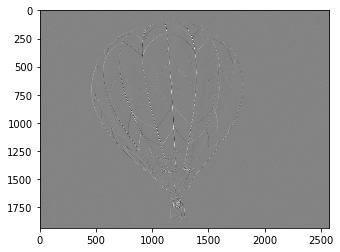

In [214]:
plt.imshow(
    ndimage.sobel(balloon[:, :, 0].astype(np.float)),
    cmap='gray'
)

### Exercise: A smoothing filter

1. Extract the green band from the balloons
2. There is an `ndimage.median_filter` - it takes two arguments: the array to smooth, and the size of the focal "annulus" - try smoothing the green band with a size of 15 and plot the results. What happens when you change the size?

In [215]:
basket = balloon[1600:, 1100:1300, 1]

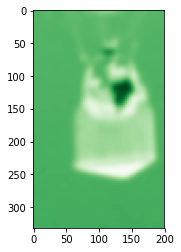

In [221]:
plt.imshow(
    ndimage.gaussian_filter(basket, 5),
    cmap='Greens'
)

In [ ]:
ndimage.gaussian_filter()

## Break: Back at 3:45

Feedback please: http://bit.ly/pythoncharmers_csiro

! pip install dask

## Statistics  - parametric and non-parametric 

In [222]:
mpg = pd.read_csv('Data/Auto.csv')['mpg']

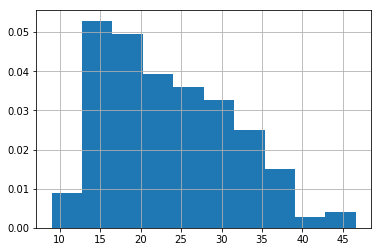

In [224]:
mpg.hist(density=True)

In [225]:
from scipy import stats

In [226]:
stats.norm?

In [227]:
stats.norm.fit(mpg)

(23.445918367346938, 7.795045762682584)

In [228]:
stats.t.fit(mpg)

(4322009.612122741, 23.445638697778513, 7.794798714487211)

In [229]:
params = stats.norm.fit(mpg)
model = stats.norm(*params)

In [230]:
x = np.arange(100)

In [233]:
model.pdf(x)  # value of the curve for the probability

array([5.55384716e-04, 8.10209181e-04, 1.16266076e-03, 1.64119992e-03,
       2.27888588e-03, 3.11269299e-03, 4.18217898e-03, 5.52740849e-03,
       7.18609783e-03, 9.19003802e-03, 1.15609656e-02, 1.43061748e-02,
       1.74142817e-02, 2.08516402e-02, 2.45599510e-02, 2.84555766e-02,
       3.24309672e-02, 3.63584224e-02, 4.00961596e-02, 4.34963830e-02,
       4.64147621e-02, 4.87204995e-02, 5.03060193e-02, 5.10952811e-02,
       5.10498242e-02, 5.01718744e-02, 4.85041638e-02, 4.61264822e-02,
       4.31493508e-02, 3.97055134e-02, 3.59401581e-02, 3.20008688e-02,
       2.80282624e-02, 2.41481129e-02, 2.04655226e-02, 1.70614170e-02,
       1.39913615e-02, 1.12864529e-02, 8.95586602e-03, 6.99053350e-03,
       5.36742114e-03, 4.05390570e-03, 3.01185619e-03, 2.20113884e-03,
       1.58238902e-03, 1.11900417e-03, 7.78399892e-04, 5.32631009e-04,
       3.58511214e-04, 2.37373188e-04, 1.54601320e-04, 9.90483739e-05,
       6.24214886e-05, 3.86966627e-05, 2.35974742e-05, 1.41550089e-05,
      

In [234]:
import matplotlib.pyplot as plt

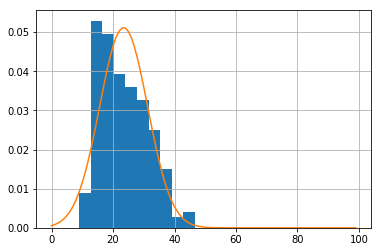

In [236]:
ax = mpg.hist(density=True)
ax.plot(x, model.pdf(x))

In [238]:
stats.kstest(mpg, model.cdf)

KstestResult(statistic=0.08201816765908443, pvalue=0.009652915992822919)

### Exercise: Fitting distributions

You've seen fitting a normal distribution. What happens when you fit a:

- gamma
- t
- lognorm
- pareto

Fit these curves to the mpg data, and create a model for each. Use the pdf function to help plot the curve for each distribution.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


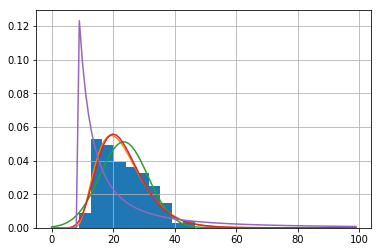

In [243]:
ax = mpg.hist(density=True)
for s in [stats.gamma, stats.t, stats.lognorm, stats.pareto]:
    params = s.fit(mpg)
    model = s(*params)
    ax.plot(x, model.pdf(x))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


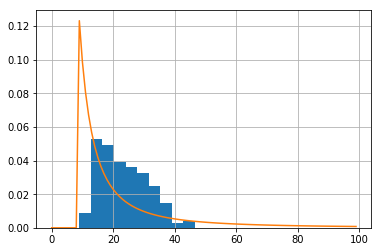

In [241]:
ax = mpg.hist(density=True)
params = stats.pareto.fit(mpg)
model = stats.pareto(*params)
y = model.pdf(x)
ax.plot(x, y)

In [245]:
model = stats.gaussian_kde(mpg)

In [246]:
y = model.pdf(x)

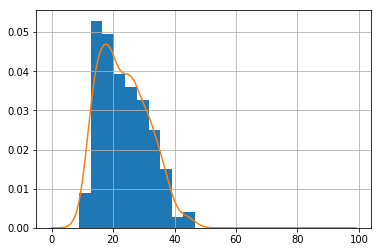

In [247]:
ax = mpg.hist(density=True)
ax.plot(x, y)

In [249]:
model  # TODO what is the 95% quantile?

Also see the bootstrap library - page 209.

In [250]:
import dask.dataframe as dd

In [255]:
rain = dd.read_csv(
    'Data/Rainfall/*.csv',
    header=None,
    names=['date', 'rain']
)

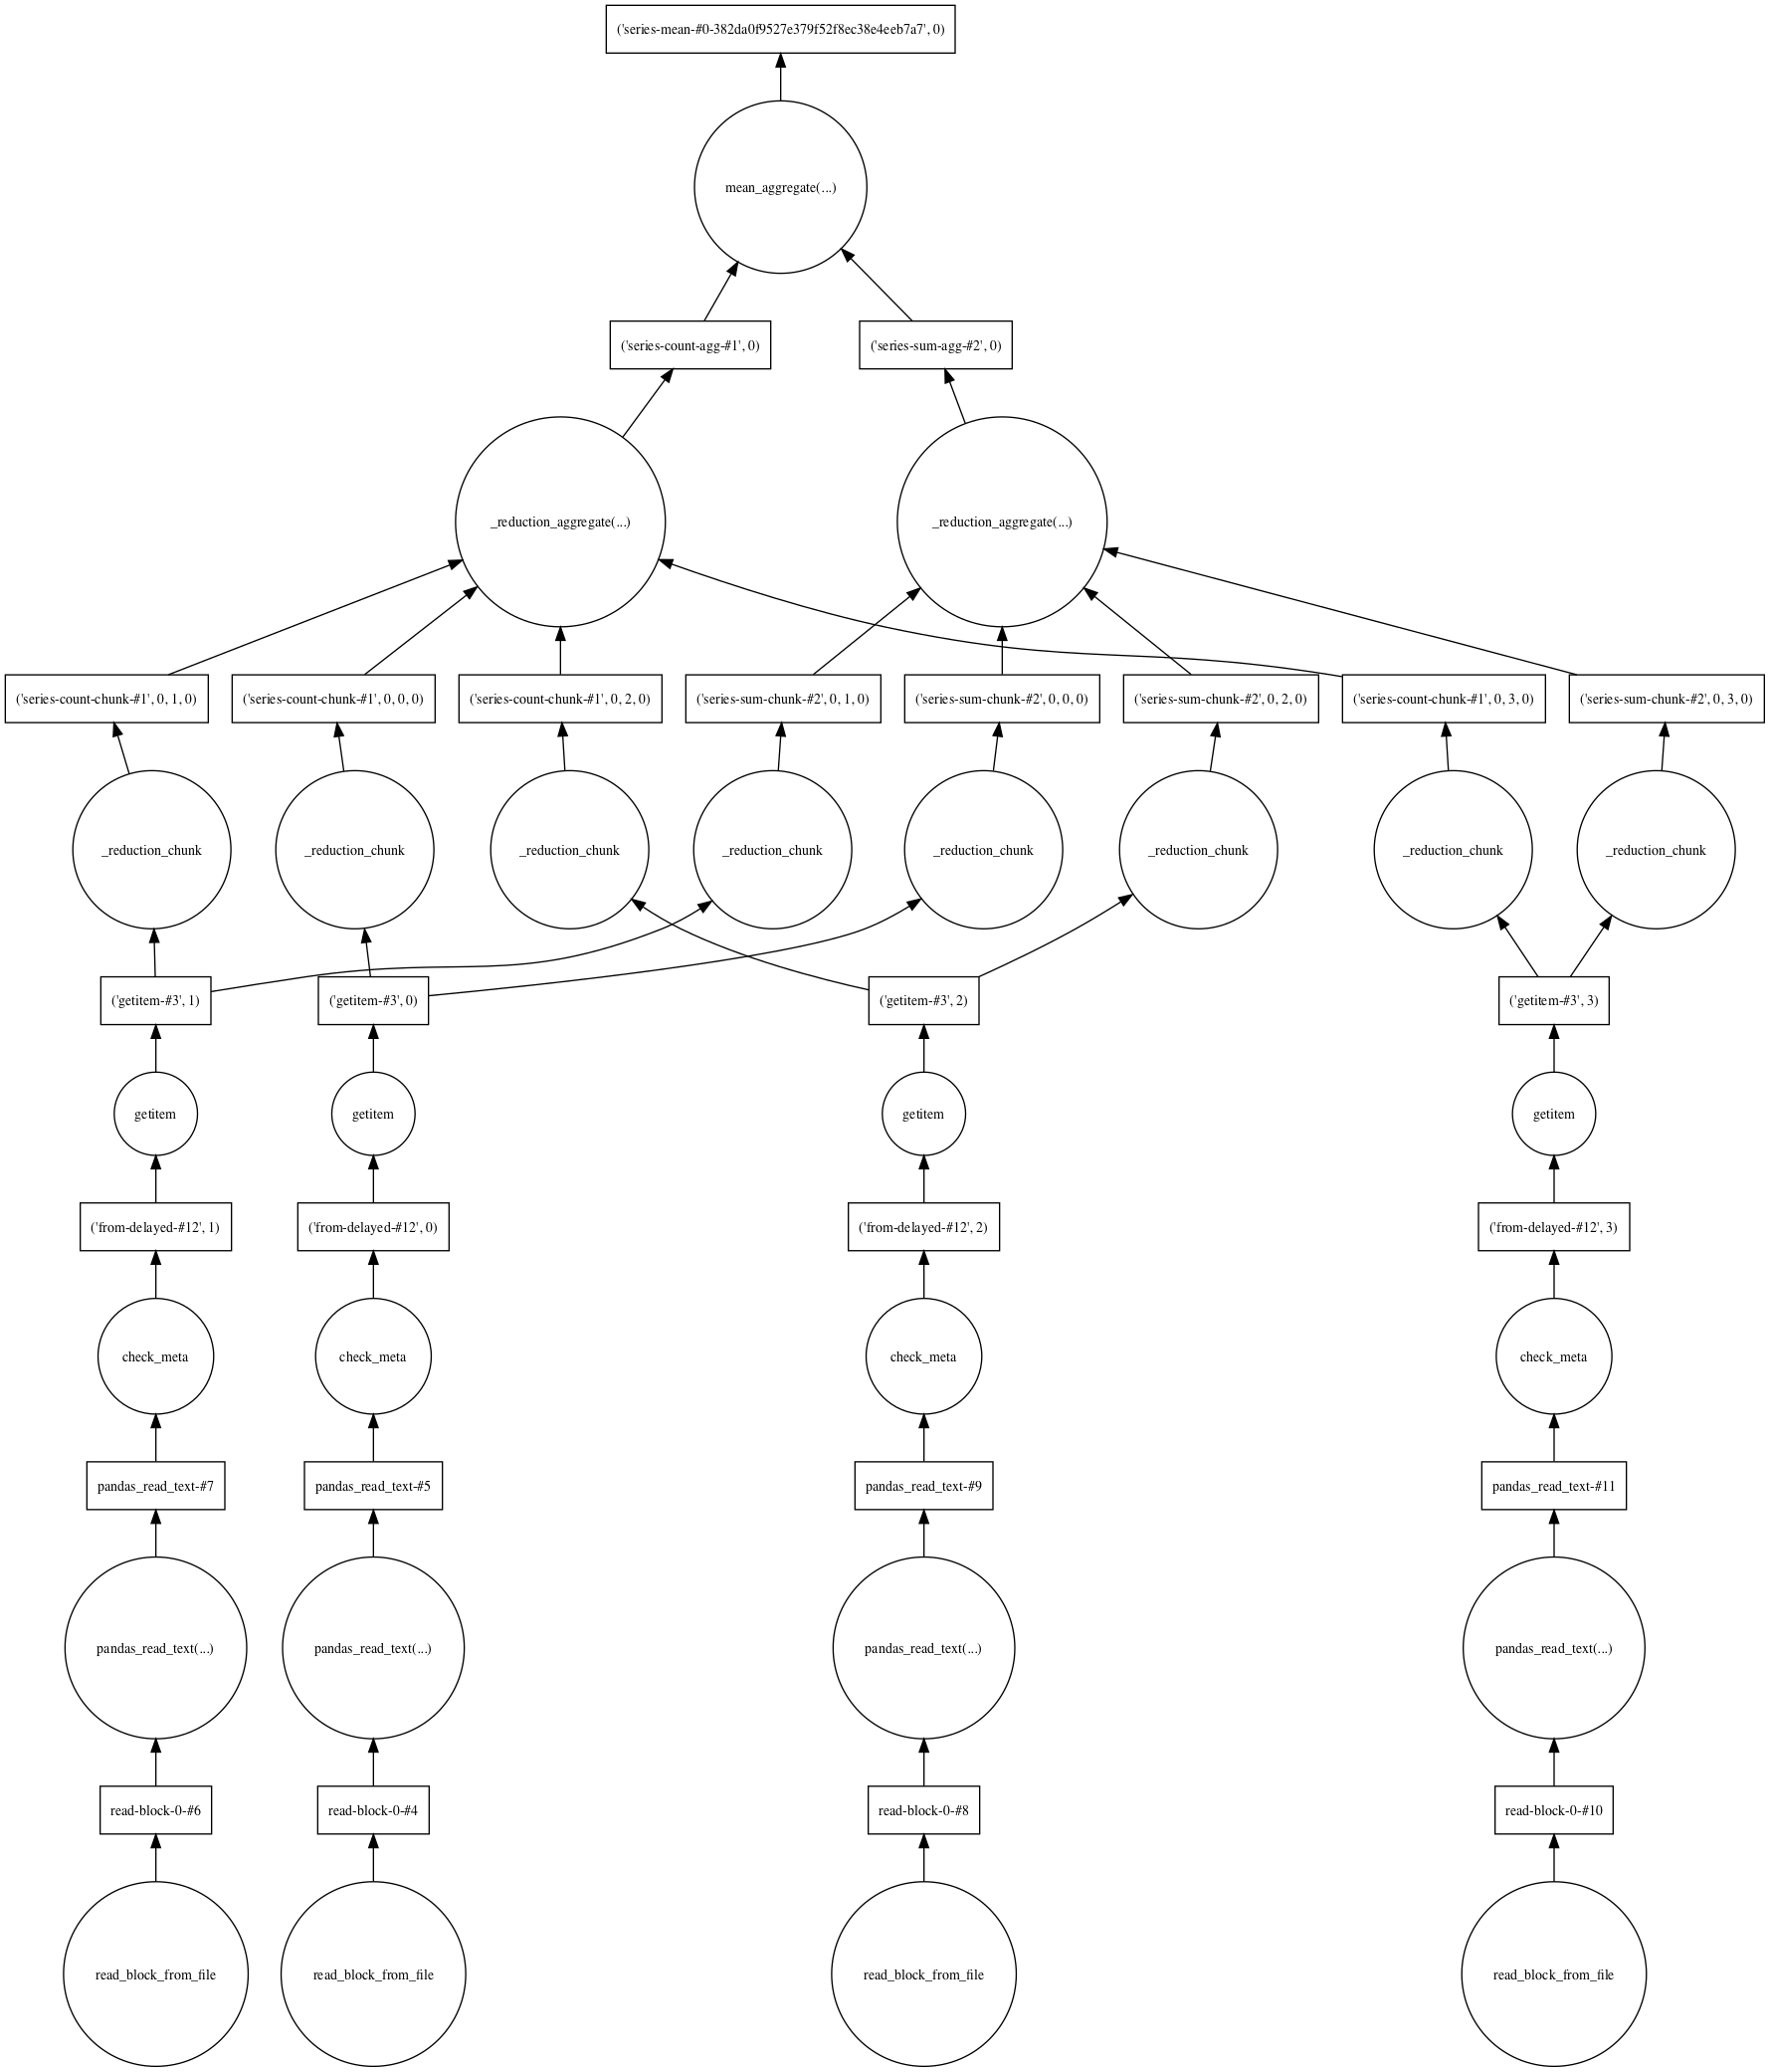

In [258]:
rain['rain'].mean().visualize()

In [259]:
rain['rain'].mean().compute()

343.1431159180413

For really big data processing check out Dask https://dask.org/

## Getting help

1. Talk to each other
2. Take a look at the docs
3. Google / StackOverflow
4. On the USB drives are:
   1. The course book in Notebook form
   2. The Documentation folder
   3. I will send around my notebooks for this course too
5. Please keep in touch - if you need a hand you can reach our team at help@pythoncharmers.com or me personally at henry@pythoncharmers.com

Thanks for the last 3 days - good luck and enjoy!